In [15]:
%matplotlib widget

import os
import sys
import matplotlib.pyplot as plt
from IPython import embed
import pickle

sys.path.append(os.path.abspath("/develop/code/evaluation"))
import evaluation_3 as eval

path_results = "/develop/results/spie_journal_2023"
colors = ['darkgreen','purple','#4e88d9'] 

In [28]:
exp_name = "baseline" # 0. phase | 1. curv | 2. recon/thermo | 3. phase/thermo 

folder_name = exp_name + "_3"
index = 0

encoder_train = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "encoder.pkl"), "rb"))
recon_train = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "recon.pkl"), "rb"))

encoder_valid =pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "encoder.pkl"), "rb"))
recon_valid = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "recon.pkl"), "rb"))

folder_name = exp_name + "_2"
# results of resim
resim_train_results = pickle.load(open(os.path.join(path_results, folder_name, "train_info", f"sample_{index}.pkl"), "rb"))
resim_valid_results = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", f"sample_{index}.pkl"), "rb"))

# outputs from the model
resim_train_eval = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "resim.pkl"), "rb"))
resim_valid_eval = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "resim.pkl"), "rb"))

folder_name = exp_name + "_3"
loss = eval.gather_loss(os.path.join(path_results,folder_name))

In [5]:
print(encoder_train.keys())
print(recon_train.keys())
print(resim_train.keys())

dict_keys(['phase_truth', 'phase_pred', 'deriv_truth', 'deriv_pred', 'intensity_truth', 'intensity_pred'])
dict_keys(['nf_2881_amp_diff', 'nf_2881_angle_diff', 'nf_1650_amp_diff', 'nf_1650_angle_diff', 'nf_1550_amp_diff', 'nf_1550_angle_diff', 'nf_1300_amp_diff', 'nf_1300_angle_diff', 'nf_1060_amp_diff', 'nf_1060_angle_diff'])
dict_keys(['near_fields_1550', 'near_fields_1060', 'near_fields_1300', 'near_fields_1650', 'near_fields_2881', 'eps_data', 'sim_time', 'radii'])


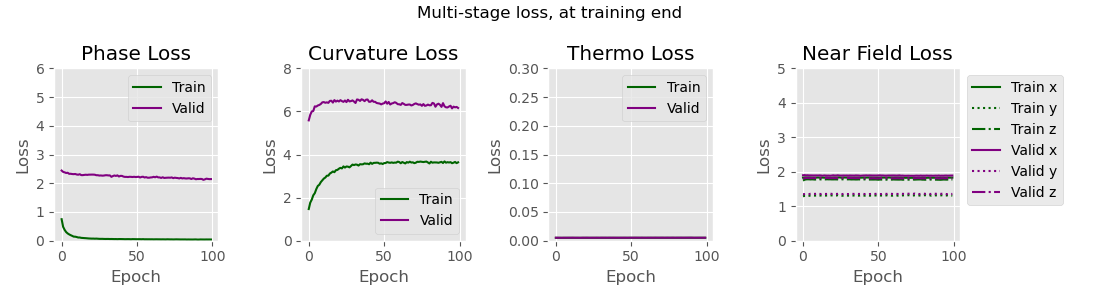

In [6]:
eval.plot_loss(loss['loss'], loss['loss'], loss['loss'], loss['loss'], "at training end")

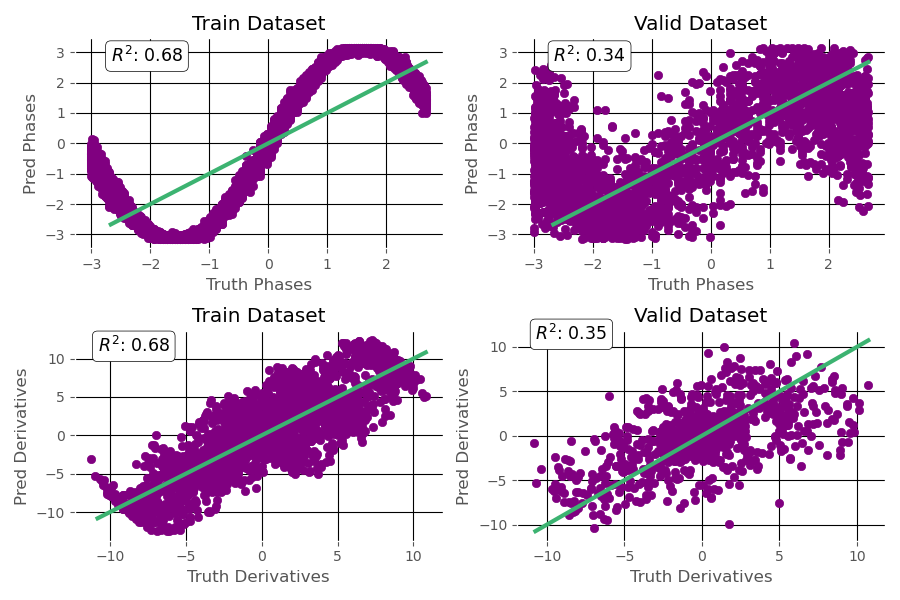

In [19]:
phase_train_truth, phase_train_pred = encoder_train['phase_truth'].flatten(), encoder_train['phase_pred'].flatten()
phase_valid_truth, phase_valid_pred = encoder_valid['phase_truth'].flatten(), encoder_valid['phase_pred'].flatten()
der_train_truth, der_train_pred = encoder_train['deriv_truth'].flatten(), encoder_train['deriv_pred'].flatten()
der_valid_truth, der_valid_pred = encoder_valid['deriv_truth'].flatten(), encoder_valid['deriv_pred'].flatten()
int_train_truth, int_train_pred = encoder_train['intensity_truth'].flatten(), encoder_train['intensity_pred'].flatten()

plt.close("all")
#eval.get_regression_plots(phase_train_results, phase_valid_results, der_train_results, der_valid_results, title = "Encoder", save_fig=False)
#eval.get_regression_plots(phase_train_results, phase_valid_results, der_train_results, der_valid_results, title = "Encoder - minimizing phase only", save_fig=False)
import numpy as np
scatter_color = "mediumseagreen"
line_color = "black"
linewidth=3
an_fontsize = 12.5
bbox = dict(boxstyle='round', facecolor='white', edgecolor='black')

def plot_scatter(ax, truth, pred, title, x_label, y_label):
    r_sq = eval.get_r_squared(truth, pred)
    ax.scatter(truth, pred, c=colors[1])
    ax.plot([-max(truth), max(truth)], [-max(truth), max(truth)], c=scatter_color, linewidth=linewidth)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.annotate(f"$R^2$: {r_sq:.2f}", (-max(truth), max(truth)), fontsize=an_fontsize, bbox=bbox)
    ax.grid(color='black')
    ax.set_facecolor('white')

x_values = np.linspace(-np.pi, np.pi, 100)

fig, ax = plt.subplots(2, 2, figsize=(9, 6))
#fig.suptitle(f"{title}")

plot_scatter(ax[0, 0], phase_train_truth, phase_train_pred, "Train Dataset", "Truth Phases", "Pred Phases")
plot_scatter(ax[0, 1], phase_valid_truth, phase_valid_pred, "Valid Dataset", "Truth Phases", "Pred Phases")
plot_scatter(ax[1, 0], der_train_truth, der_train_pred, "Train Dataset", "Truth Derivatives", "Pred Derivatives")
plot_scatter(ax[1, 1], der_valid_truth, der_valid_pred, "Valid Dataset", "Truth Derivatives", "Pred Derivatives")

fig.set_facecolor('white')
fig.tight_layout()


In [ ]:
plt.close("all")

eval.violin_plots(recon_train_results['nf_1550_amp_diff'], recon_train_results['nf_1550_angle_diff'], 
             'Train Dataset', savefig=False)
eval.violin_plots(recon_valid_results['nf_1550_amp_diff'], recon_valid_results['nf_1550_angle_diff'],  
             'Valid Dataset', savefig=False)

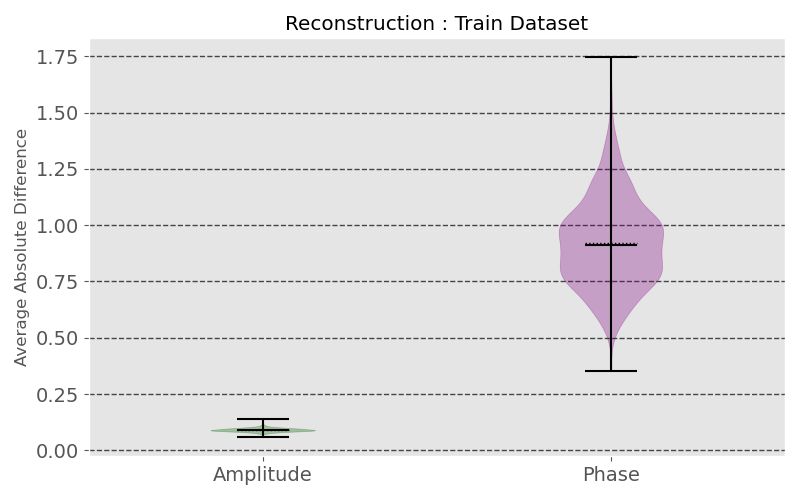

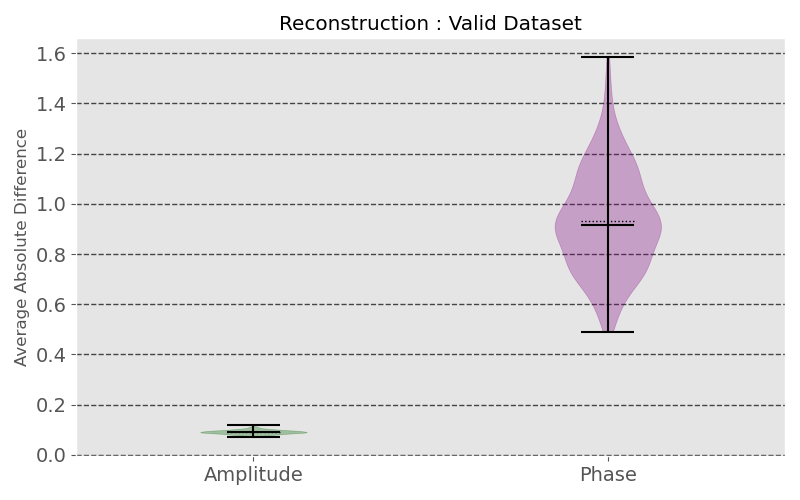

In [20]:
# recon_folder = os.path.join(path_results, exp_name + "_2")
# recon_train_results, recon_valid_results = eval.get_results(recon_folder, "recon.pkl")

eval.violin_plots(recon_train['nf_1550_amp_diff'], recon_train['nf_1550_angle_diff'], 
             'Train Dataset', savefig=False)
eval.violin_plots(recon_valid['nf_1550_amp_diff'], recon_valid['nf_1550_angle_diff'],  
             'Valid Dataset', savefig=False)

In [27]:
#plot_dft_fields(truth, recon, resim, target, batch=True, idx=None, savefig=False)
print(resim_train_results.keys())
print(resim_valid_results.keys())

dict_keys(['near_fields_1550', 'near_fields_1060', 'near_fields_1300', 'near_fields_1650', 'near_fields_2881', 'eps_data', 'sim_time', 'radii'])
dict_keys(['near_fields_1550', 'near_fields_1060', 'near_fields_1300', 'near_fields_1650', 'near_fields_2881', 'eps_data', 'sim_time', 'radii'])


In [31]:
##### get near field truth, recon, and resim values ####

nf_truth_train = resim_train_results['near_fields_1550']['ey']
nf_truth_valid = resim_valid_results['near_fields_1550']['ey']

nf_recon_train = resim_train_eval['nf_1550_pred']
nf_recon_valid = resim_valid_eval['nf_1550_pred']

nf_recon_train.shape

(16, 3, 2, 166, 166)

In [ ]:
plt.close("all")

similarity = True
amplitude_matrix, phase_matrix = eval.build_custom_conf_matrices(nf_truth_train, nf_recon_train, 
                                                             nf_resim_train, similarity = similarity, savefig=False)
eval.plot_custom_confusion_matrix(amplitude_matrix, phase_matrix, similarity=similarity, savefig=False)